Adversarial attacks on machine learning models involve inputting carefully crafted data to manipulate the model's output or decision-making process. These attacks can pose significant security risks and thus, it is crucial to perform security testing on machine learning models to ensure their robustness against adversarial attacks.

1. **Types of Adversarial Attacks**:

   - **White-box attacks**: The attacker has complete knowledge of the model, including its architecture, parameters, and training data.
   - **Black-box attacks**: The attacker only has access to the model's inputs and outputs and does not have any knowledge of its architecture or parameters.
   - **Gray-box attacks**: The attacker has partial knowledge of the model, such as its architecture, but does not know the model parameters or training data.

2. **Common Adversarial Attacks**:

   - **Fast Gradient Sign Method (FGSM)**: This is a white-box attack where the attacker uses the gradients of the model to create adversarial examples.
   - **DeepFool**: This is another white-box attack where the attacker iteratively modifies the input data until the model misclassifies it.
   - **Carlini & Wagner (C&W) Attack**: This white-box attack optimizes the input to minimize the difference between the adversarial example and the original input, while ensuring that the model misclassifies the adversarial example.
   - **Adversarial Patch**: This is a physical-world attack where the attacker places a patch with a specific pattern in the camera's field of view to fool a model.
   - **One-Pixel Attack**: This is a black-box attack where the attacker changes only one pixel in the input image to fool the model.

3. **Security Testing for Adversarial Attacks**:

   - **Adversarial Training**: This involves training the model on adversarial examples along with the original training data. This helps the model to become more robust to adversarial attacks.
   - **Robustness Testing**: This involves evaluating the model's performance on adversarial examples. There are several metrics to measure the robustness of a model, such as the adversarial perturbation needed to fool the model, the number of successful attacks, and the degradation in model performance.
   - **Transferability Testing**: This involves generating adversarial examples using one model and testing them on another model. This is especially important for black-box attacks where the attacker does not have access to the target model.
   - **Defensive Distillation**: This involves training a second model (the distilled model) on the soft outputs of the first model (the teacher model) to make it more robust to adversarial attacks.

4. **Tools for Security Testing**:

   - **CleverHans**: This is a Python library that provides implementations of popular adversarial attacks and defenses. It is a useful tool for testing the robustness of machine learning models.
   - **Adversarial Robustness Toolbox (ART)**: This is another Python library that provides tools for generating adversarial examples and evaluating the robustness of machine learning models.
   - **Foolbox**: This is a Python library that provides a wide range of adversarial attacks and allows to benchmark the robustness of machine learning models.

5. **Challenges and Future Directions**:

   - **Evasion vs. Interpretability**: There is a trade-off between the imperceptibility of the adversarial perturbation and the success rate of the attack. More imperceptible perturbations are harder to detect but may be less successful in fooling the model.
   - **Transferability vs. Targeted Attacks**: Transferable attacks, which work across different models, are generally less successful than targeted attacks that are optimized for a specific model.
   - **Physical-world Attacks**: Physical-world attacks are more challenging than digital attacks because of the variability in lighting, camera angle, and other environmental factors.

Security testing for adversarial attacks is crucial for ensuring the robustness and security of machine learning models. There are several tools available for generating adversarial examples and evaluating the robustness of models. However, there are still many challenges and open questions in this area that need to be addressed.


# White box attack on MNIST data set

Creating a white box attack on the MNIST dataset involves a series of steps:

1. Import the necessary libraries.
2. Load the MNIST dataset.
3. Create and train a model.
4. Craft an adversarial example.
5. Evaluate the model on the adversarial example.

Below is an example code that does all these steps using the cleverhans library.

In [4]:
!pip install cleverhans

  Using cached cleverhans-4.0.0-py3-none-any.whl (92 kB)
     |████████████████████████████████| 8.5 MB 6.4 MB/s eta 0:00:01     |██▎                             | 593 kB 6.4 MB/s eta 0:00:02
     |████████████████████████████████| 154 kB 18.0 MB/s eta 0:00:01
     |████████████████████████████████| 41 kB 591 kB/s  eta 0:00:01
     |████████████████████████████████| 309 kB 33.9 MB/s eta 0:00:01
  Using cached mnist-0.2.2-py2.py3-none-any.whl (3.5 kB)
     |████████████████████████████████| 6.7 MB 34.2 MB/s eta 0:00:01
     |████████████████████████████████| 28.8 MB 7.0 MB/s eta 0:00:012     |█████████████████████▍          | 19.3 MB 7.0 MB/s eta 0:00:02
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     |████████████████████████████████| 3.0 MB 23.2 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 10.1 MB/s eta 0:00:01
  Created wheel for easydict: filename=easydict-1.11-py3-none-any.whl size=6680 sha256=4a9beb4601ee41cb6ee2c6d3e35c3394f5ed72749e3d7ae884a3e747173

Successfully built easydict
Failed to build dm-tree
    Running setup.py install for dm-tree ... error
    ERROR: Command errored out with exit status 1:
     command: /Users/rakeshpodder/opt/anaconda3/envs/CS540/bin/python -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/cy/xqvbtsps4c554p7w04g2ywb00000gn/T/pip-install-mssic1c7/dm-tree_d893b6b1f2eb4b4c9d967ee041eae360/setup.py'"'"'; __file__='"'"'/private/var/folders/cy/xqvbtsps4c554p7w04g2ywb00000gn/T/pip-install-mssic1c7/dm-tree_d893b6b1f2eb4b4c9d967ee041eae360/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /private/var/folders/cy/xqvbtsps4c554p7w04g2ywb00000gn/T/pip-record-aykzr6f7/install-record.txt --single-version-externally-managed --compile --install

In [5]:
!pip install git+https://github.com/CNOCycle/cleverhans.git@feature/tf2.x

  Cloning https://github.com/CNOCycle/cleverhans.git (to revision feature/tf2.x) to /private/var/folders/cy/xqvbtsps4c554p7w04g2ywb00000gn/T/pip-req-build-6imwydgc
  Running command git clone -q https://github.com/CNOCycle/cleverhans.git /private/var/folders/cy/xqvbtsps4c554p7w04g2ywb00000gn/T/pip-req-build-6imwydgc
  Running command git checkout -b feature/tf2.x --track origin/feature/tf2.x
  Switched to a new branch 'feature/tf2.x'
  branch 'feature/tf2.x' set up to track 'origin/feature/tf2.x'.
  Resolved https://github.com/CNOCycle/cleverhans.git to commit b103b0caf983331ec9c5f7c3e08e417a85bf25e2
  Using cached nose-1.3.7-py3-none-any.whl (154 kB)
  Using cached pycodestyle-2.10.0-py2.py3-none-any.whl (41 kB)
  Using cached scipy-1.5.4-cp36-cp36m-macosx_10_9_x86_64.whl (28.8 MB)
  Using cached matplotlib-3.3.4-cp36-cp36m-macosx_10_9_x86_64.whl (8.5 MB)
  Using cached mnist-0.2.2-py2.py3-none-any.whl (3.5 kB)
  Using cached tensorflow_probability-0.19.0-py2.py3-none-any.whl (6.7 MB)

Successfully built cleverhans
Failed to build dm-tree
    Running setup.py install for dm-tree ... error
    ERROR: Command errored out with exit status 1:
     command: /Users/rakeshpodder/opt/anaconda3/envs/CS540/bin/python -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/cy/xqvbtsps4c554p7w04g2ywb00000gn/T/pip-install-c6rj034i/dm-tree_5eb3fb51045b497f893bd3b6d1a1c0e0/setup.py'"'"'; __file__='"'"'/private/var/folders/cy/xqvbtsps4c554p7w04g2ywb00000gn/T/pip-install-c6rj034i/dm-tree_5eb3fb51045b497f893bd3b6d1a1c0e0/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /private/var/folders/cy/xqvbtsps4c554p7w04g2ywb00000gn/T/pip-record-02a4qc2j/install-record.txt --single-version-externally-managed --compile --insta

In [6]:
!pip install --upgrade cleverhans

  Using cached cleverhans-4.0.0-py3-none-any.whl (92 kB)
  Using cached tensorflow_probability-0.19.0-py2.py3-none-any.whl (6.7 MB)
  Using cached scipy-1.5.4-cp36-cp36m-macosx_10_9_x86_64.whl (28.8 MB)
  Using cached mnist-0.2.2-py2.py3-none-any.whl (3.5 kB)
  Using cached joblib-1.1.1-py2.py3-none-any.whl (309 kB)
  Using cached nose-1.3.7-py3-none-any.whl (154 kB)
  Using cached easydict-1.11-py3-none-any.whl
  Using cached pycodestyle-2.10.0-py2.py3-none-any.whl (41 kB)
  Using cached matplotlib-3.3.4-cp36-cp36m-macosx_10_9_x86_64.whl (8.5 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached cloudpickle-2.2.1-py3-none-any.whl (25 kB)
  Using cached dm-tree-0.1.8.tar.gz (35 kB)
  ERROR: Command errored out with exit status 1:
   command: /Users/rakeshpodder/opt/anaconda3/envs/CS540/bin/python -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/cy/xqvbtsps4c554p7w04g2ywb00000gn/T/pip-install-xnyo1c9a/dm-tree_2f48df9361624368ad

In [2]:
!pip install tenserflow

ERROR: Could not find a version that satisfies the requirement tenserflow (from versions: none)
ERROR: No matching distribution found for tenserflow


In [1]:
import tensorflow as tf
import numpy as np
from cleverhans.future.tf2.attacks import fast_gradient_method
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile and train the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

# Evaluate the model
loss, acc = model.evaluate(test_images, test_labels)
print("Loss = {}, accuracy = {}".format(loss, acc))

# Craft adversarial examples
epsilon = 0.1
adv_images_fsgm_cleaverhans = fast_gradient_method(model, test_images, epsilon, np.inf)

# Evaluate the model on adversarial examples
loss, acc = model.evaluate(adv_images_fsgm_cleaverhans, test_labels)
print("Loss = {}, accuracy = {}".format(loss, acc))

2023-10-31 13:03:32.371670: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


ModuleNotFoundError: No module named 'cleverhans.future'

In [ ]:
import matplotlib.pyplot as plt

# Display an original image and its corresponding adversarial image
plt.figure(figsize=(5, 5))

plt.subplot(1, 2, 1)
plt.imshow(test_images[0].squeeze(), cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(adv_images_fsgm_cleaverhans[0].numpy().squeeze(), cmap='gray')
plt.title('Adversarial Image')

plt.show()

# ART

## FSGM Attack

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2982 - accuracy: 0.9139
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1564 - accuracy: 0.9549
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1258 - accuracy: 0.9641
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1111 - accuracy: 0.9696
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.1060 - accuracy: 0.9731
Loss = 0.10596857964992523, accuracy = 0.9731000065803528
313/313 [==============================] - 1s 2ms/step - loss: 8.4887 - accuracy: 0.1396
Loss = 8.488692283630371, accuracy = 0.1395999938249588


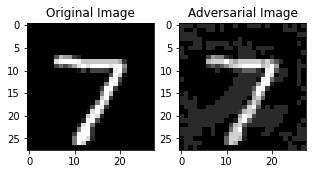

In [5]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from art.estimators.classification import TensorFlowV2Classifier
from art.attacks.evasion import FastGradientMethod
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images[..., tf.newaxis] / 255.0, test_images[..., tf.newaxis] / 255.0

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile and train the model
model.compile(optimizer='RMSProp',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

# Evaluate the model
loss, acc = model.evaluate(test_images, test_labels)
print("Loss = {}, accuracy = {}".format(loss, acc))

# Create a TensorFlowV2Classifier
classifier = TensorFlowV2Classifier(model=model, nb_classes=2, input_shape=(28, 28, 1), loss_object=tf.keras.losses.SparseCategoricalCrossentropy())

# Create a FastGradientMethod attack
attack = FastGradientMethod(estimator=classifier, eps=0.1)

# Generate adversarial examples
adv_images_fsgm = attack.generate(x=test_images)

# Evaluate the model on adversarial examples
loss, acc = model.evaluate(adv_images_fsgm, test_labels)
print("Loss = {}, accuracy = {}".format(loss, acc))

# Display an original image and its corresponding adversarial image
plt.figure(figsize=(5, 5))

plt.subplot(1, 2, 1)
plt.imshow(test_images[0].squeeze(), cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(adv_images_fsgm[0].squeeze(), cmap='gray')
plt.title('Adversarial Image')
# Save the figure
plt.savefig('comparison_image.png', dpi=300)
plt.show()


The given code is a Python script using the TensorFlow and Adversarial Robustness Toolbox (ART) libraries to train a neural network on the MNIST dataset, then generate adversarial examples using the Fast Gradient Sign Method (FGSM) attack, and finally evaluate the model's performance on the adversarial examples. Here's a step-by-step explanation:

1. **Import necessary libraries**: The necessary libraries and modules are imported, including TensorFlow, NumPy, ART, and matplotlib.

2. **Load MNIST dataset**: The MNIST dataset, which is a dataset of 60,000 28x28 grayscale images of handwritten digits, along with a test set of 10,000 images, is loaded and preprocessed (normalized).

3. **Create the model**: A simple neural network model is created using TensorFlow's Keras API. The model consists of a Flatten layer that converts each 28x28 image into a 784 element vector, followed by a Dense layer with 128 nodes, a Dropout layer that randomly sets 20% of the input units to 0 during training, and a final Dense layer with 10 nodes corresponding to the 10 possible digits (0-9).

4. **Compile and train the model**: The model is compiled using the 'adam' optimizer and the 'sparse_categorical_crossentropy' loss function, and then trained on the training images and labels for 5 epochs.

5. **Evaluate the model**: The trained model is evaluated on the test images and labels to get the baseline loss and accuracy.

6. **Create a TensorFlowV2Classifier**: ART's TensorFlowV2Classifier is created using the trained model. This classifier will be used as the input to the FGSM attack.

7. **Create a FastGradientMethod attack**: ART's FastGradientMethod attack is created using the classifier and an epsilon value of 0.1.

8. **Generate adversarial examples**: Adversarial examples are generated from the test images using the FGSM attack.

9. **Evaluate the model on adversarial examples**: The model is evaluated on the adversarial examples to see how well it performs in the presence of an attack.

10. **Display an original and adversarial image**: The original and adversarial images for the first test example are displayed side by side using matplotlib.

In summary, the script trains a simple neural network on the MNIST dataset, generates adversarial examples using the FGSM attack, evaluates the model's performance on the adversarial examples, and displays an original and adversarial image. This demonstrates how easy it is for an attacker to fool a neural network using adversarial examples and highlights the importance of developing robust models that can withstand adversarial attacks.


In the provided code snippet:

1. **Evaluation**: 
   - The model is first evaluated on the original test images and labels using `model.evaluate(test_images, test_labels)`. This function returns the loss and accuracy of the model on the provided data.
   - Then, the model is evaluated on the adversarial examples using `model.evaluate(adv_images, test_labels)`.

2. **Loss**: 
   - The loss is computed during the model compilation phase with `model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])`. Here, the 'sparse_categorical_crossentropy' loss function is used.
   - During the evaluation phase, the `model.evaluate` function returns the loss on the test data or adversarial examples.

3. **Accuracy**: 
   - Accuracy is specified as a metric during the model compilation phase with the same `model.compile` function. This means that the accuracy will be computed and displayed during the training and evaluation phases.
   - During the evaluation phase, the `model.evaluate` function returns the accuracy on the test data or adversarial examples.

In terms of the code:

- The model is trained using the `model.fit` function on the `train_images` and `train_labels`.

```python
model.fit(train_images, train_labels, epochs=5)
```

- After training, the model is evaluated on the original test images and labels.

```python
loss, acc = model.evaluate(test_images, test_labels)
print("Loss = {}, accuracy = {}".format(loss, acc))
```

- The `FastGradientMethod` attack is then used to generate adversarial examples from the test images.

```python
adv_images = attack.generate(x=test_images)
```

- The model is then evaluated on these adversarial examples.

```python
loss, acc = model.evaluate(adv_images, test_labels)
print("Loss = {}, accuracy = {}".format(loss, acc))
```

So, in terms of the code, the `model.compile` function is used to specify the loss function and metrics (including accuracy) to be used, the `model.fit` function is used to train the model, the `model.evaluate` function is used to compute the loss and accuracy of the model on the test data and adversarial examples, and the `attack.generate` function is used to generate the adversarial examples.


In [6]:
from sewar.full_ref import ergas, psnr, ssim, sam
import numpy as np
import pandas as pd

# Assuming test_images and adv_images are already defined
# For example, 
original_np = test_images[0]
adv_fsgm_np = adv_images_fsgm[0]

# Compute ERGAS
ergas_fsgm = ergas(original_np, adv_fsgm_np)

# Convert images to [0, 255] scale for PSNR, SSIM, SAM computation
original_scaled = (original_np * 255).astype(np.uint8)
adv_fsgm_scaled = (adv_fsgm_np * 255).astype(np.uint8)

# Compute PSNR
psnr_fsgm = psnr(original_scaled, adv_fsgm_scaled)

# Compute SSIM
ssim_fsgm = ssim(original_scaled, adv_fsgm_scaled)

# Compute SAM
sam_fsgm = sam(original_scaled, adv_fsgm_scaled)

# Create a table
data = {
    'Metric': ['ERGAS', 'PSNR', 'SSIM', 'SAM'],
    'FGSM_ART': [ergas_fsgm, psnr_fsgm, ssim_fsgm, sam_fsgm]
}

df = pd.DataFrame(data)
print(df)


  Metric                                  FGSM_ART
0  ERGAS                                 27.083559
1   PSNR                                 21.969064
2   SSIM  (0.8725788956024089, 0.9420325380846428)
3    SAM                                  0.294001


## DeepFool Attack

2023-11-28 12:40:13.227094: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-28 12:40:43.985460: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2932 - accuracy: 0.9157
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1447 - accuracy: 0.9577
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1097 - accuracy: 0.9668
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0891 - accuracy: 0.9719
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.0757 - accuracy: 0.9779
Loss = 0.07569744437932968, accuracy = 0.9779000282287598


DeepFool:   0%|          | 0/10000 [00:00<?, ?it/s]

313/313 [==============================] - 1s 1ms/step - loss: 2782.8855 - accuracy: 0.0158
Loss = 2782.885498046875, accuracy = 0.015799999237060547


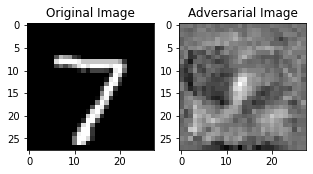

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from art.estimators.classification import TensorFlowV2Classifier
from art.attacks.evasion import DeepFool
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images[..., tf.newaxis] / 255.0, test_images[..., tf.newaxis] / 255.0

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile and train the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

# Evaluate the model
loss, acc = model.evaluate(test_images, test_labels)
print("Loss = {}, accuracy = {}".format(loss, acc))

# Create a TensorFlowV2Classifier
classifier = TensorFlowV2Classifier(model=model, nb_classes=10, input_shape=(28, 28, 1), loss_object=tf.keras.losses.SparseCategoricalCrossentropy())

# Create a DeepFool attack
attack = DeepFool(classifier)

# Generate adversarial examples
adv_images_deepfool = attack.generate(x=test_images)

# Evaluate the model on adversarial examples
loss, acc = model.evaluate(adv_images_deepfool, test_labels)
print("Loss = {}, accuracy = {}".format(loss, acc))

# Display an original image and its corresponding adversarial image
plt.figure(figsize=(5, 5))

plt.subplot(1, 2, 1)
plt.imshow(test_images[0].squeeze(), cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(adv_images_deepfool[0].squeeze(), cmap='gray')
plt.title('Adversarial Image')
# Save the figure
plt.savefig('deepfool.png', dpi=300)
plt.show()


In [7]:
from sewar.full_ref import ergas, psnr, ssim, sam
import numpy as np
import pandas as pd

# Assuming test_images and adv_images_deepfool are already defined
# For example, 
original_np = test_images[0]
adv_df_np = adv_images_deepfool[0]

# Compute ERGAS
ergas_df = ergas(original_np, adv_df_np)

# Convert images to [0, 255] scale for PSNR, SSIM, SAM computation
original_scaled = (original_np * 255).astype(np.uint8)
adv_df_scaled = (adv_df_np * 255).astype(np.uint8)

# Compute PSNR
psnr_df = psnr(original_scaled, adv_df_scaled)

# Compute SSIM
ssim_df = ssim(original_scaled, adv_df_scaled)

# Compute SAM
sam_df = sam(original_scaled, adv_df_scaled)

df['DeepFool'] = [ergas_df, psnr_df, ssim_df, sam_df]

print(df)


  Metric                                  FGSM_ART  \
0  ERGAS                                 27.083559   
1   PSNR                                 21.969064   
2   SSIM  (0.8725788956024089, 0.9420325380846428)   
3    SAM                                  0.294001   

                                      DeepFool  
0                                  3254.478193  
1                                     2.617978  
2  (-0.09643183409964816, -0.1583597429174046)  
3                                     1.365663  


/Users/rakeshpodder/opt/anaconda3/lib/python3.9/site-packages/sewar/utils.py:18: UserWarning: Supplied images have different dtypes float64 and float32
  warnings.warn(msg)


## C&W Attack

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2942 - accuracy: 0.9140
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1414 - accuracy: 0.9580
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1079 - accuracy: 0.9672
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0864 - accuracy: 0.9729
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.0704 - accuracy: 0.9790
Loss = 0.0704258382320404, accuracy = 0.9789999723434448


C&W L_2:   0%|          | 0/1000 [00:00<?, ?it/s]

32/32 [==============================] - 0s 1ms/step - loss: 0.2139 - accuracy: 0.8080
Loss = 0.21394164860248566, accuracy = 0.8080000281333923


TypeError: Invalid shape (1000, 28, 28) for image data

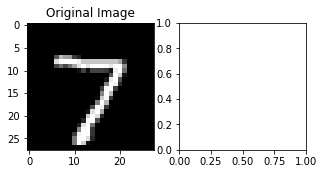

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from art.estimators.classification import TensorFlowV2Classifier
from art.attacks.evasion import CarliniL2Method
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images[..., tf.newaxis] / 255.0, test_images[..., tf.newaxis] / 255.0

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile and train the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

# Evaluate the model
loss, acc = model.evaluate(test_images, test_labels)
print("Loss = {}, accuracy = {}".format(loss, acc))

# Create a TensorFlowV2Classifier
classifier = TensorFlowV2Classifier(model=model, nb_classes=10, input_shape=(28, 28, 1), loss_object=tf.keras.losses.SparseCategoricalCrossentropy())

# Create a Carlini & Wagner L2 attack
attack = CarliniL2Method(classifier)

# Generate an adversarial example for a single test image
adv_images_cw = attack.generate(x=test_images[:1000])

# Evaluate the model on the adversarial example
loss, acc = model.evaluate(adv_images_cw, test_labels[:1000])
print("Loss = {}, accuracy = {}".format(loss, acc))


# Display the original image and its corresponding adversarial image
plt.figure(figsize=(5, 5))

plt.subplot(1, 2, 1)
plt.imshow(test_images[0].squeeze(), cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(adv_images_cw.squeeze(), cmap='gray')
plt.title('Adversarial Image')
# Save the figure
plt.savefig('CW.png', dpi=300)
plt.show()


In [ ]:
from sewar.full_ref import ergas, psnr, ssim, sam
import numpy as np
import pandas as pd

# Assuming test_images and adv_images_cw are already defined
# For example, 
original_np = test_images[0]
adv_cw_np = adv_images[0]

# Compute ERGAS
ergas_cw = ergas(original_np, adv_cw_np)

# Convert images to [0, 255] scale for PSNR, SSIM, SAM computation
original_scaled = (original_np * 255).astype(np.uint8)
adv_cw_scaled = (adv_cw_np * 255).astype(np.uint8)

# Compute PSNR
psnr_cw = psnr(original_scaled, adv_cw_scaled)

# Compute SSIM
ssim_cw = ssim(original_scaled, adv_cw_scaled)

# Compute SAM
sam_cw = sam(original_scaled, adv_cw_scaled)

# Create a table
df['C&W'] = [ergas_cw, psnr_cw, ssim_cw, sam_cw]

print(df)


## PGD Attack

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2963 - accuracy: 0.9149
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1447 - accuracy: 0.9560
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1090 - accuracy: 0.9672
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0862 - accuracy: 0.9736
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.0750 - accuracy: 0.9769
Loss = 0.07495884597301483, accuracy = 0.9768999814987183


PGD - Batches: 0it [00:00, ?it/s]

313/313 [==============================] - 0s 1ms/step - loss: 80.8931 - accuracy: 0.0135
Loss = 80.89309692382812, accuracy = 0.013500000350177288


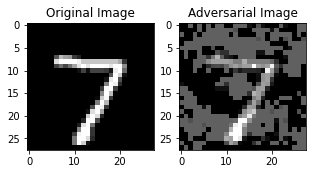

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from art.estimators.classification import TensorFlowV2Classifier
from art.attacks.evasion import ProjectedGradientDescent
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images[..., tf.newaxis] / 255.0, test_images[..., tf.newaxis] / 255.0

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile and train the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

# Evaluate the model
loss, acc = model.evaluate(test_images, test_labels)
print("Loss = {}, accuracy = {}".format(loss, acc))

# Create a TensorFlowV2Classifier
classifier = TensorFlowV2Classifier(model=model, nb_classes=10, input_shape=(28, 28, 1), loss_object=tf.keras.losses.SparseCategoricalCrossentropy())

# Create a Projected Gradient Descent attack
attack = ProjectedGradientDescent(classifier)

# Generate adversarial examples
adv_images_pgd = attack.generate(x=test_images)

# Evaluate the model on adversarial examples
loss, acc = model.evaluate(adv_images_pgd, test_labels)
print("Loss = {}, accuracy = {}".format(loss, acc))

# Display the original image and its corresponding adversarial image
plt.figure(figsize=(5, 5))

plt.subplot(1, 2, 1)
plt.imshow(test_images[0].squeeze(), cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(adv_images_pgd[0].squeeze(), cmap='gray')
plt.title('Adversarial Image')
# Save the figure
plt.savefig('PGD.png', dpi=300)
plt.show()

In [ ]:
from sewar.full_ref import ergas, psnr, ssim, sam
import numpy as np
import pandas as pd

# Assuming test_images and adv_images_pgd are already defined
# For example, 
original_np = test_images[0]
adv_pgd_np = adv_images_pgd[0]

# Compute ERGAS
ergas_pgd = ergas(original_np, adv_pgd_np)

# Convert images to [0, 255] scale for PSNR, SSIM, SAM computation
original_scaled = (original_np * 255).astype(np.uint8)
adv_pgd_scaled = (adv_pgd_np * 255).astype(np.uint8)

# Compute PSNR
psnr_pgd = psnr(original_scaled, adv_pgd_scaled)

# Compute SSIM
ssim_pgd = ssim(original_scaled, adv_pgd_scaled)

# Compute SAM
sam_pgd = sam(original_scaled, adv_pgd_scaled)

df['PGD'] = [ergas_pgd, psnr_pgd, ssim_pgd, sam_pgd]

print(df)


# Jacobian Saliency Map Approach (JSMA) 

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2939 - accuracy: 0.9138
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1421 - accuracy: 0.9571
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1056 - accuracy: 0.9679
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0874 - accuracy: 0.9732
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0757 - accuracy: 0.9756
Loss = 0.07573507726192474, accuracy = 0.975600004196167


JSMA:   0%|          | 0/10 [00:00<?, ?it/s]

1/1 [==============================] - 0s 29ms/step - loss: 1.2881 - accuracy: 0.0000e+00
Loss = 1.2880805730819702, accuracy = 0.0


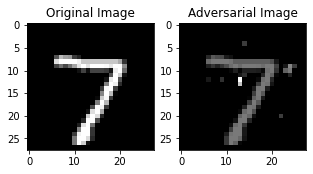

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from art.estimators.classification import TensorFlowV2Classifier
from art.attacks.evasion import SaliencyMapMethod
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images[..., tf.newaxis] / 255.0, test_images[..., tf.newaxis] / 255.0

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile and train the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

# Evaluate the model
loss, acc = model.evaluate(test_images, test_labels)
print("Loss = {}, accuracy = {}".format(loss, acc))

# Create a TensorFlowV2Classifier
classifier = TensorFlowV2Classifier(model=model, nb_classes=10, input_shape=(28, 28, 1))

# Create a SaliencyMapMethod attack
attack = SaliencyMapMethod(classifier=classifier, theta=0.1, gamma=0.1)

# Generate adversarial examples
adv_images_jsma = attack.generate(x=test_images[:10])

# Evaluate the model on adversarial examples
loss, acc = model.evaluate(adv_images_jsma, test_labels[:10])
print("Loss = {}, accuracy = {}".format(loss, acc))

# Display an original image and its corresponding adversarial image
plt.figure(figsize=(5, 5))

plt.subplot(1, 2, 1)
plt.imshow(test_images[0].squeeze(), cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(adv_images_jsma[0].squeeze(), cmap='gray')
plt.title('Adversarial Image')
# Save the figure
plt.savefig('JSMA.png', dpi=300)
plt.show()


In [ ]:
from sewar.full_ref import ergas, psnr, ssim, sam

# Assuming test_images and adv_images_jsma are already defined
# For example, 
original_np = test_images[0]
adv_jsma_np = adv_images_jsma[0]

# Compute ERGAS
ergas_jsma = ergas(original_np, adv_jsma_np)

# Convert images to [0, 255] scale for PSNR, SSIM, SAM computation
original_scaled = (original_np * 255).astype(np.uint8)
adv_jsma_scaled = (adv_jsma_np * 255).astype(np.uint8)

# Compute PSNR
psnr_jsma = psnr(original_scaled, adv_jsma_scaled)

# Compute SSIM
ssim_jsma = ssim(original_scaled, adv_jsma_scaled)

# Compute SAM
sam_jsma = sam(original_scaled, adv_jsma_scaled)

df['JSMA'] = [ergas_jsma, psnr_jsma, ssim_jsma, sam_jsma]

print(df)


# Basic Iterative Method (BIM)

he Basic Iterative Method (BIM) is essentially another name for the Projected Gradient Descent (PGD) attack when it is applied iteratively with small steps, so the PGD and BIM are the same in this context.

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2956 - accuracy: 0.9127
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1439 - accuracy: 0.9571
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1073 - accuracy: 0.9672
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0888 - accuracy: 0.9715
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0745 - accuracy: 0.9765


PGD - Batches: 0it [00:00, ?it/s]

313/313 [==============================] - 1s 1ms/step - loss: 16.5568 - accuracy: 0.0221
Loss = 16.556760787963867, accuracy = 0.022099999710917473


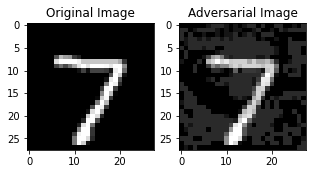

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from art.estimators.classification import TensorFlowV2Classifier
from art.attacks.evasion import BasicIterativeMethod

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images[..., tf.newaxis] / 255.0, test_images[..., tf.newaxis] / 255.0

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile and train the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

# Specify the loss object
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Create a TensorFlowV2Classifier
classifier = TensorFlowV2Classifier(model=model, nb_classes=10, input_shape=(28, 28, 1), loss_object=loss_object)

# Create a BasicIterativeMethod attack
attack = BasicIterativeMethod(estimator=classifier, eps=0.1, max_iter=10)

# Generate adversarial examples
adv_images_bim = attack.generate(x=test_images)

# Evaluate the model on adversarial examples
loss, acc = model.evaluate(adv_images_bim, test_labels)
print("Loss = {}, accuracy = {}".format(loss, acc))


# Display an original image and its corresponding adversarial image
plt.figure(figsize=(5, 5))

plt.subplot(1, 2, 1)
plt.imshow(test_images[0].squeeze(), cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(adv_images_bim[0].squeeze(), cmap='gray')
plt.title('Adversarial Image')
# Save the figure
plt.savefig('BIM.png', dpi=300)
plt.show()


In [ ]:
from sewar.full_ref import ergas, psnr, ssim, sam

# Assuming test_images and adv_images_bim are already defined
# For example, 
original_np = test_images[0]
adv_bim_np = adv_images_bim[0]

# Compute ERGAS
ergas_bim = ergas(original_np, adv_bim_np)

# Convert images to [0, 255] scale for PSNR, SSIM, SAM computation
original_scaled = (original_np * 255).astype(np.uint8)
adv_bim_scaled = (adv_bim_np * 255).astype(np.uint8)

# Compute PSNR
psnr_bim = psnr(original_scaled, adv_bim_scaled)

# Compute SSIM
ssim_bim = ssim(original_scaled, adv_bim_scaled)

# Compute SAM
sam_bim = sam(original_scaled, adv_bim_scaled)

df['BIM'] = [ergas_bim, psnr_bim, ssim_bim, sam_bim]

print(df)


| Metric | FGSM_ART | DeepFool | C&W | PGD | JSMA | BIM |
| --- | --- | --- | --- | --- | --- | --- |
| ERGAS | 27.083559 | 3544.499881 | 78.336928 | 79.739665 | 29.71897 | 26.560325 |
| PSNR | 22.509347 | 2.522771 | 13.407438 | 13.522398 | 23.566446 | 22.556069 |
| SSIM | (0.8848, 0.9435) | (-0.1325, -0.2413) | (0.6317, 0.7062) | (0.6396, 0.7096) | (0.9278, 0.9349) | (0.8957, 0.9456) |
| SAM | 0.275201 | 1.400431 | 0.748577 | 0.749326 | 0.236896 | 0.273624 |

- **ERGAS**: The ERGAS (Relative Dimensionless Global Error in Synthesis) is an error metric used for image analysis. Lower ERGAS values indicate better quality (closer to the original image), and a value of 0 would mean no error.

- **PSNR**: The Peak Signal-to-Noise Ratio is a measure used for image quality assessment. Higher PSNR values indicate better quality, and ideally, PSNR would be infinite (meaning the images are identical).

- **SSIM**: The Structural Similarity Index measures the perceived changes between two images. The SSIM index ranges from -1 to 1, where 1 indicates the images being compared are identical. In your table, it is shown as a pair of values, probably representing SSIM computed on two different color channels or regions of the image.

- **SAM**: The Spectral Angle Mapper (SAM) is another metric used for image analysis, which measures the spectral similarity between two images. Lower SAM values indicate higher similarity, and a value of 0 would mean the images are identical.

The columns represent different adversarial attack methods:

- **FGSM_ART**: Fast Gradient Sign Method. This is a type of adversarial attack where small perturbations are added to the image to cause the model to misclassify it.

- **DeepFool**: This is another type of adversarial attack that aims to find the minimum amount of perturbation necessary to cause a model to misclassify an image.

- **C&W**: Carlini & Wagner attack. This is a more sophisticated and powerful adversarial attack method.

- **PGD**: Projected Gradient Descent. This is a type of adversarial attack that iteratively finds the optimal perturbations to add to the image to cause a model to misclassify it.

- **JSMA**: Jacobian-based Saliency Map Attack. This is an adversarial attack that uses the gradients of the model to find the most important pixels to perturb.

- **BIM**: Basic Iterative Method. This is another iterative method for generating adversarial examples.

The values in the table represent how each attack affects the image according to each metric. For example, the ERGAS value for the FGSM_ART attack is 27.08, which represents the amount of error introduced by this attack as measured by the ERGAS metric.


In [ ]:

# Define the colors
row_colors = ["#FFDDC1", "#FFABAB", "#FFC3A0", "#FF677D"]
col_colors = ["#D4A5A5", "#392F5A", "#31A2AC", "#61C0BF", "#6B4226"]

# Create a color matrix for cells (same color for all cells)
cell_colors = [["#FFFCF7"] * len(df.columns) for _ in range(len(df))]

# Save the styled dataframe as an image
fig = plt.figure(figsize=(18, 6))  # adjust the size to fit the dataframe
ax = fig.add_subplot(111, frame_on=False)
plt.axis('off')
the_table = plt.table(cellText=df.values, colLabels=df.columns, loc='center', cellColours=cell_colors)
the_table.auto_set_font_size(False)
the_table.set_fontsize(7)  # adjust the font size

# Apply colors to rows and columns
for k, cell in the_table.get_celld().items():
    if k[0] == 0:
        cell.set_facecolor(col_colors[k[1]])
        cell.set_text_props(color='white')
    elif k[1] == -1:
        cell.set_facecolor(row_colors[k[0]-1])
        cell.set_text_props(color='white')

plt.savefig('df.png', dpi=300, bbox_inches='tight')

# Save the dataframe to a CSV file
df.to_csv('df.csv', index=False)

plt.show()


In [ ]:
!pip install spectral

In [ ]:
# Create figure
fig, ax = plt.subplots(figsize=(18, 4))
ax.axis('tight')
ax.axis('off')

# Create table and set its properties
the_table = ax.table(cellText=df.values, colLabels=df.columns, loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(8)
the_table.scale(1.6, 1.6)

# Set row colors
for k, cell in the_table.get_celld().items():
    cell.set_edgecolor("black")
    if k[0] == 0:
        cell.set_facecolor("grey")
    else:
        cell.set_facecolor("white")

plt.savefig('output.png')

# Save the dataframe to a CSV file
df.to_csv('output.csv', index=False)


# White box attack on CIFAR-10 data set

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False)

# Define the models
lenet = models.lenet()
resnet20 = models.resnet20()
resnet44 = models.resnet44()
resnet56 = models.resnet56()
densenet = models.densenet121()

# Here I am using Resnet, Len
models = [lenet, resnet20, resnet44, resnet56, densenet]
model_names = ['LeNet', 'ResNet20', 'ResNet44', 'ResNet56', 'DenseNet']

# Define a Loss function and optimizer
criterion = nn.CrossEntropyLoss()

# Train the networks
for model in models:
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
    for epoch in range(2):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

    print(f'Finished Training {model}')

# Define FGSM attack
def fgsm_attack(image, epsilon, data_grad):
    sign_data_grad = data_grad.sign()
    perturbed_image = image + epsilon * sign_data_grad
    perturbed_image = torch.clamp(perturbed_image, 0, 1)
    return perturbed_image

# Test the model after FGSM attack
def test_attack(model, testloader, epsilon):
    correct = 0
    adv_examples = []

    for data, target in testloader:
        data, target = data.to(device), target.to(device)
        data.requires_grad = True
        output = model(data)
        init_pred = output.max(1, keepdim=True)[1]

        if init_pred.item() != target.item():
            continue

        loss = F.nll_loss(output, target)
        model.zero_grad()
        loss.backward()
        data_grad = data.grad.data
        perturbed_data = fgsm_attack(data, epsilon, data_grad)

        output = model(perturbed_data)

        final_pred = output.max(1, keepdim=True)[1]
        if final_pred.item() == target.item():
            correct += 1
            if (epsilon == 0) and (len(adv_examples) < 5):
                adv_ex = perturbed_data.squeeze().detach().cpu().numpy()
                adv_examples.append((init_pred.item(), final_pred.item(), adv_ex))
        else:
            if len(adv_examples) < 5:
                adv_ex = perturbed_data.squeeze().detach().cpu().numpy()
                adv_examples.append((init_pred.item(), final_pred.item(), adv_ex))

    final_acc = correct / float(len(testloader))
    print("Epsilon: {}\tTest Accuracy = {} / {} = {}".format(epsilon, correct, len(testloader), final_acc))

    return final_acc, adv_examples

epsilons = [0, .05, .1, .15, .2, .25, .3]

# Run test for each model
for model, model_name in zip(models, model_names):
    print(f'\nTesting {model_name}')
    accuracies = []
    examples = []

    for eps in epsilons:
        acc, ex = test_attack(model, testloader, eps)
        accuracies.append(acc)
        examples.append(ex)

    plt.figure(figsize=(5,5))
    plt.plot(epsilons, accuracies, "*-")
    plt.yticks(np.arange(0, 1.1, step=0.1))
    plt.xticks(np.arange(0, .35, step=0.05))
    plt.title(f"Accuracy vs Epsilon for {model_name}")
    plt.xlabel("Epsilon")
    plt.ylabel("Accuracy")
    plt.show()

    # Plot several examples of adversarial samples at each epsilon
    cnt = 0
    plt.figure(figsize=(8,10))
    for i in range(len(epsilons)):
        for j in range(len(examples[i])):
            cnt += 1
            plt.subplot(len(epsilons),len(examples[0]),cnt)
            plt.xticks([], [])
            plt.yticks([], [])
            if j == 0:
                plt.ylabel("Eps: {}".format(epsilons[i]), fontsize=14)
            orig,adv,ex = examples[i][j]
            plt.title("{} -> {}".format(orig, adv))
            plt.imshow(ex, cmap="gray")
    plt.tight_layout()
    plt.show()



# Black Box Testing

In [10]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from art.attacks.evasion import PixelAttack
from art.estimators.classification import KerasClassifier

# Disable eager execution for TensorFlow
tf.compat.v1.disable_eager_execution()

# Load and preprocess MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Add channel dimension
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

x_train, x_test = x_train.astype(np.float32) / 255, x_test.astype(np.float32) / 255
y_train, y_test = to_categorical(y_train), to_categorical(y_test)


# Define a simple neural network model
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=1)

# Create a KerasClassifier wrapper
classifier = KerasClassifier(model=model, clip_values=(0, 1))

# PixelAttack
attack = PixelAttack(classifier, th=1, es=1, targeted=False, verbose=True)

# Select a sample to be attacked
sample = x_test[0].reshape((1, 28, 28))

# Add the channel dimension
sample = np.expand_dims(sample, axis=-1)
sample_label = y_test[0]

# Apply the attack
adv_sample = attack.generate(sample)


# Evaluate
preds = classifier.predict(sample)
adv_preds = classifier.predict(adv_sample)

print(f"Original prediction: {np.argmax(preds)}, Adversarial prediction: {np.argmax(adv_preds)}")


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2559 - accuracy: 0.9277
Epoch 2/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.1133 - accuracy: 0.9671
Epoch 3/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0784 - accuracy: 0.9769
Epoch 4/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0593 - accuracy: 0.9818
Epoch 5/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0462 - accuracy: 0.9858


Pixel threshold: 0it [00:00, ?it/s]

Original prediction: 7, Adversarial prediction: 7
